<a href="https://colab.research.google.com/github/Ritikrajcode/Google_Stocks/blob/main/Google_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/content/Google_Stock_Price_Train.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [46]:
data_train = pd.read_csv("/content/Google_Stock_Price_Train.csv")
data_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [47]:
train = data_train.loc[:,["Open"]].values
print(train)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

train_scaled = scaler.fit_transform(train)
print(train_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [49]:
x_train = []
y_train = []
timesteps = 5

for i in range(timesteps, 1258):
    x_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [50]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(x_train)
print(y_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  [0.0643277 ]
  [0.0585423 ]]

 ...

 [[0.96294367]
  [0.96123223]
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.96123223]
  [0.95475854]
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.95475854]
  [0.95204256]
  [0.95163331]
  [0.95725128]
  [0.93796041]]]
[0.0643277  0.0585423  0.06568569 ... 0.95725128 0.93796041 0.93688146]


In [52]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout
regressor = Sequential()
regressor.add(SimpleRNN(units = 100, activation="relu", return_sequences=True ,input_shape = (x_train.shape[1], 1)))
regressor.add(SimpleRNN(units = 100, activation="relu", return_sequences=True))
regressor.add(SimpleRNN(units = 100 , activation="relu", return_sequences=True))
regressor.add(SimpleRNN(units = 100))
regressor.add(Dense(units=1))
regressor.compile(optimizer= "adam", loss = "mean_squared_error")
regressor.fit(x_train, y_train, epochs = 100, batch_size = 1)

Epoch 1/100
1253/1253 [==============================] - 6s 3ms/step - loss: 0.0030
Epoch 2/100
1253/1253 [==============================] - 5s 4ms/step - loss: 0.0015
Epoch 3/100
1253/1253 [==============================] - 4s 3ms/step - loss: 9.7334e-04
Epoch 4/100
1253/1253 [==============================] - 5s 4ms/step - loss: 9.7050e-04
Epoch 5/100
1253/1253 [==============================] - 5s 4ms/step - loss: 9.9529e-04
Epoch 6/100
1253/1253 [==============================] - 6s 4ms/step - loss: 8.9628e-04
Epoch 7/100
1253/1253 [==============================] - 5s 4ms/step - loss: 7.4252e-04
Epoch 8/100
1253/1253 [==============================] - 4s 3ms/step - loss: 6.9748e-04
Epoch 9/100
1253/1253 [==============================] - 4s 3ms/step - loss: 6.3083e-04
Epoch 10/100
1253/1253 [==============================] - 5s 4ms/step - loss: 7.5060e-04
Epoch 11/100
1253/1253 [==============================] - 4s 3ms/step - loss: 6.0286e-04
Epoch 12/100
1253/1253 [==============

In [53]:
data_test = pd.read_csv("/content/Google_Stock_Test (2023).csv")
data_test.head()

,Date,Open,High,Low,Close,Volume
0,03-01-2023,89.589996,91.050003,88.519997,89.120003,28131200
1,04-01-2023,90.349998,90.650002,87.269997,88.080002,34854800
2,05-01-2023,87.470001,87.570000,85.900002,86.199997,27194400
3,06-01-2023,86.790001,87.690002,84.860001,87.339996,41381500
4,09-01-2023,88.360001,90.050003,87.860001,88.019997,29003900


In [54]:
real_stock_price = data_test.loc[:, ["Open"]].values
print(real_stock_price)

[[ 89.589996]
 [ 90.349998]
 [ 87.470001]
 [ 86.790001]
 [ 88.360001]
 [ 85.980003]
 [ 89.18    ]
 [ 91.480003]
 [ 90.849998]
 [ 92.059998]
 [ 92.139999]
 [ 90.720001]
 [ 95.099998]
 [ 97.949997]
 [ 98.099998]
 [ 95.57    ]
 [ 96.5     ]
 [ 97.309998]
 [ 97.480003]
 [ 96.870003]
 [ 98.709999]
 [105.800003]
 [102.93    ]
 [102.400002]
 [103.220001]
 [102.050003]
 [100.      ]
 [ 95.449997]
 [ 94.739998]
 [ 94.43    ]
 [ 94.489998]
 [ 95.370003]
 [ 94.849998]
 [ 93.      ]
 [ 91.699997]
 [ 91.919998]
 [ 89.440002]
 [ 89.870003]
 [ 89.330002]
 [ 89.980003]
 [ 89.660004]
 [ 92.480003]
 [ 94.019997]
 [ 94.980003]
 [ 94.120003]
 [ 94.050003]
 [ 92.169998]
 [ 90.089996]
 [ 92.559998]
 [ 93.220001]
 [ 96.199997]
 [100.260002]
 [100.120003]
 [101.25    ]
 [104.269997]
 [105.059998]
 [104.989998]
 [104.620003]
 [102.440002]
 [102.279999]
 [100.910004]
 [101.300003]
 [102.389999]
 [104.330002]
 [105.779999]
 [105.260002]
 [106.980003]
 [106.550003]
 [106.580002]
 [105.839996]
 [106.889999]
 [104.

In [55]:
data_total = pd.concat((data_train["Open"], data_test["Open"]), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) # min max scaler
inputs

array([[ 0.95204256],
       [ 0.95163331],
       [ 0.95725128],
       [ 0.93796041],
       [ 0.93688146],
       [-0.3525746 ],
       [-0.3511608 ],
       [-0.35651834],
       [-0.35778332],
       [-0.35486271],
       [-0.35929012],
       [-0.3533373 ],
       [-0.3490587 ],
       [-0.35023068],
       [-0.34797976],
       [-0.34783094],
       [-0.3504725 ],
       [-0.34232458],
       [-0.33702285],
       [-0.33674381],
       [-0.34145026],
       [-0.33972022],
       [-0.33821341],
       [-0.33789716],
       [-0.33903192],
       [-0.33560905],
       [-0.32241982],
       [-0.32775876],
       [-0.32874469],
       [-0.32721929],
       [-0.32939578],
       [-0.33320932],
       [-0.34167349],
       [-0.34299427],
       [-0.34357095],
       [-0.34345934],
       [-0.3418223 ],
       [-0.34278965],
       [-0.34623112],
       [-0.34864946],
       [-0.3482402 ],
       [-0.35285363],
       [-0.35205372],
       [-0.35305826],
       [-0.35184909],
       [-0

3/3 [==============================] - 0s 4ms/step


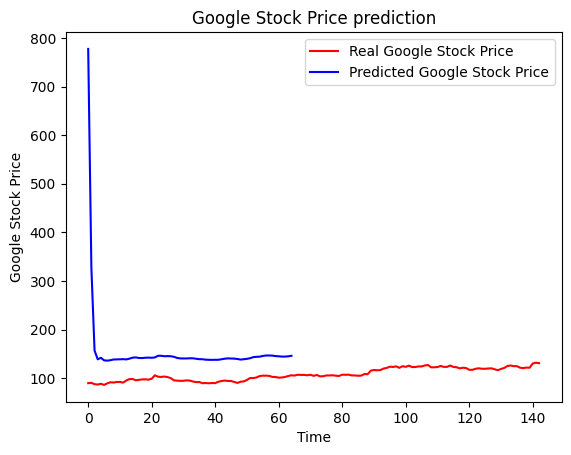

In [56]:
x_test = []
for i in range(timesteps, 70):
    if len(inputs[i-timesteps:i, 0]) == timesteps:
        x_test.append(inputs[i-timesteps:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicte_stock_price = regressor.predict(x_test)
predicte_stock_price = scaler.inverse_transform(predicte_stock_price)

# visualising the results
plt.plot(real_stock_price, color = "red", label = "Real Google Stock Price")
plt.plot(predicte_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

In [57]:
print(predicte_stock_price)

[[777.3405 ]
 [327.2151 ]
 [156.7613 ]
 [138.61343]
 [141.7962 ]
 [136.59293]
 [135.9578 ]
 [136.80247]
 [138.31618]
 [138.48953]
 [138.7174 ]
 [139.00897]
 [138.46672]
 [140.021  ]
 [142.06204]
 [142.5854 ]
 [141.34996]
 [141.30885]
 [141.91565]
 [142.17621]
 [141.86319]
 [142.53754]
 [145.96936]
 [145.93558]
 [144.9905 ]
 [145.20338]
 [145.01767]
 [143.87096]
 [141.54077]
 [140.52446]
 [140.4003 ]
 [140.46082]
 [140.79103]
 [140.71953]
 [139.81961]
 [138.9292 ]
 [138.86371]
 [137.9068 ]
 [137.64723]
 [137.51231]
 [137.73903]
 [137.6696 ]
 [138.80225]
 [139.93086]
 [140.58165]
 [140.29344]
 [140.1184 ]
 [139.33134]
 [138.15326]
 [138.85887]
 [139.64903]
 [140.99289]
 [143.15756]
 [143.80357]
 [144.12668]
 [145.60326]
 [146.51953]
 [146.52258]
 [146.28448]
 [145.2971 ]
 [144.87442]
 [144.31238]
 [144.28738]
 [144.83424]
 [145.8864 ]]
